In [1]:
# !pip3 install geopandas
# !pip3 install osmnx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx

In [2]:
points = [(40.735490680487295, -73.9929921189605),
             (40.753127135716895, -73.99060237919237),
             (40.74540657493507, -73.99368604424726),
             (40.780089796366646, -73.95527034053846)]

In [3]:
# entire New York dataframe
ACS_2012_5YR_TRACT_36_NEW_YORK = gpd.read_file('/content/drive/MyDrive/Urban Data Final Project/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb', layer='ACS_2012_5YR_TRACT_36_NEW_YORK')

# only get New York City
polydf = ACS_2012_5YR_TRACT_36_NEW_YORK.loc[ACS_2012_5YR_TRACT_36_NEW_YORK['COUNTYFP'].isin(['061'])]

In [4]:
# set up parameters
tags = {'shop':['bakery']}
dist = 1000

In [5]:
# plot graphs
def plot_nearby():
    geo.crs = polydf.crs
    fig, ax = plt.subplots(figsize = (10, 10))
    polydf.plot(ax=ax, column='COUNTYFP', alpha=0.5)
    plt.axis([point[1]-0.03, point[1]+0.03, point[0]-0.04, point[0]+0.04])
    plt.title('(' + str(point[1]) + ', '+ str(point[0]) + ')', color='white')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    geo.plot(ax=ax, markersize=20, cmap = 'jet', alpha = 0.5, legend = True, column=geo.shop)
    plt.savefig(fname='1')
    # geo.plot(ax=ax, markersize=20, cmap = 'hot', alpha = 0.5, legend = True, column = geo.tourism)

27
27
22
12


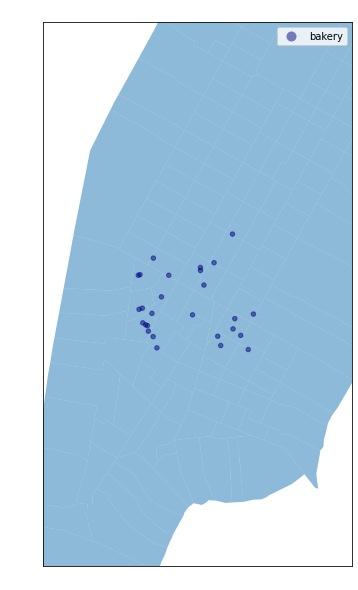

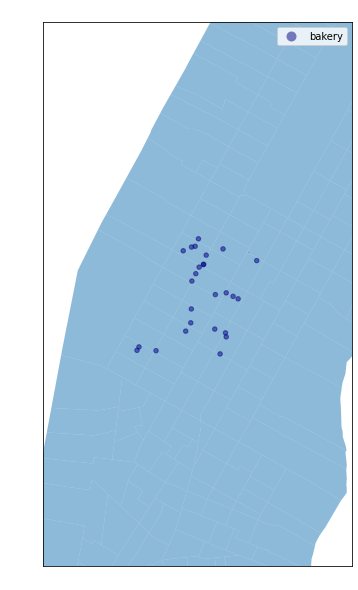

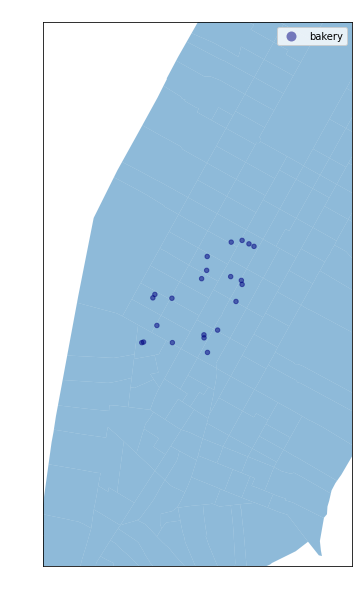

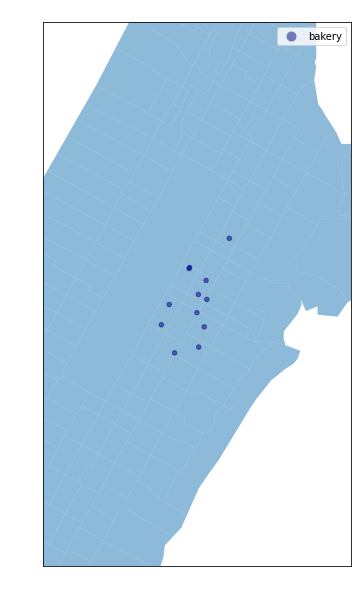

In [6]:
for point in points:
    geo = osmnx.geometries_from_point(point, tags, dist=dist)
    print(len(geo))
    plot_nearby()

In [7]:
# get store data and find how many bakeries around each point
jul = pd.read_csv("/content/drive/MyDrive/Urban Data Final Project/core_poi-patterns-1.csv")
aug = pd.read_csv("/content/drive/MyDrive/Urban Data Final Project/core_poi-patterns-2.csv")
sep = pd.read_csv("/content/drive/MyDrive/Urban Data Final Project/core_poi-patterns-3.csv")

df = pd.concat([jul, aug, sep])


new_df = df.groupby(['latitude','longitude'])['raw_visitor_counts'].agg(['sum','count']).reset_index()
new_df['visits_per_month'] = new_df['sum']//new_df['count']
results = []
for geo_loc, visitor_count in zip(zip(new_df['latitude'],new_df['longitude']), new_df['visits_per_month']):
    
    bakery_count = len(osmnx.geometries_from_point((geo_loc), tags, dist=dist))
    if bakery_count != 'nan' or len(bakery_count) != 0:
      results.append((visitor_count, bakery_count))
      print(geo_loc, bakery_count, visitor_count)
new_df

(40.53719, -74.239047) 0 43.0
(40.567149, -74.112941) 1 198.0
(40.579716, -73.938656) 1 67.0
(40.614104, -73.916738) 1 130.0
(40.614613, -73.898197) 0 800.0
(40.643118, -73.960622) 1 154.0
(40.648704, -73.979118) 1 35.0
(40.654768, -73.961624) 0 164.0
(40.663383, -73.976791) 1 nan
(40.665519, -73.826196) 0 258.0
(40.668707, -73.986321) 7 227.0
(40.668902, -73.986174) 7 1.0
(40.668916, -73.986171) 7 184.0
(40.669832, -73.843339) 0 224.0
(40.670355, -73.852113) 0 153.0
(40.677499, -73.980066) 12 11.0
(40.681339, -73.99663) 10 60.0
(40.682953, -73.832189) 1 87.0
(40.685016, -73.994833) 13 85.0
(40.691215, -73.99194) 9 95.0
(40.692106, -73.990991) 8 160.0
(40.693009, -73.732596) 0 1.0
(40.694157, -73.984154) 7 322.0
(40.702072, -74.011873) 3 282.0
(40.704306, -74.011888) 3 11.0
(40.704334, -74.011855) 3 32.0
(40.704493, -74.006108) 3 1.0
(40.704535, -74.008943) 3 61.0
(40.70456, -74.008925) 3 4.0
(40.704572, -74.008912) 3 17.0
(40.704576, -74.008922) 3 19.0
(40.704753, -74.008538) 3 99.0
(

,latitude,longitude,sum,count,visits_per_month
0,40.537190,-74.239047,129.0,3,43.0
1,40.567149,-74.112941,596.0,3,198.0
2,40.579716,-73.938656,201.0,3,67.0
3,40.614104,-73.916738,390.0,3,130.0
4,40.614613,-73.898197,2400.0,3,800.0
...,...,...,...,...,...
1676,40.868342,-73.917839,354.0,3,118.0
1677,40.873877,-73.917333,8.0,3,2.0
1678,40.874116,-73.916622,21.0,3,7.0
1679,40.875910,-73.823603,248.0,3,82.0


In [8]:
import math

[(43.0, 0), (198.0, 1), (67.0, 1), (130.0, 1), (154.0, 1), (35.0, 1), (164.0, 0), (258.0, 0), (227.0, 7), (1.0, 7), (184.0, 7), (224.0, 0), (153.0, 0), (11.0, 12), (60.0, 10), (87.0, 1), (85.0, 13), (95.0, 9), (160.0, 8), (1.0, 0), (322.0, 7), (282.0, 3), (11.0, 3), (32.0, 3), (1.0, 3), (61.0, 3), (4.0, 3), (17.0, 3), (19.0, 3), (99.0, 3), (131.0, 4), (1.0, 3), (214.0, 3), (30.0, 3), (39.0, 4), (391.0, 7), (40.0, 3), (32.0, 4), (12.0, 3), (57.0, 3), (146.0, 3), (240.0, 0), (179.0, 3), (173.0, 4), (88.0, 3), (11.0, 3), (41.0, 3), (61.0, 3), (147.0, 4), (105.0, 5), (123.0, 3), (73.0, 7), (55.0, 3), (54.0, 4), (49.0, 3), (55.0, 3), (45.0, 3), (116.0, 5), (354.0, 3), (311.0, 8), (108.0, 10), (26.0, 13), (126.0, 3), (121.0, 6), (46.0, 5), (37.0, 5), (138.0, 3), (189.0, 2), (103.0, 14), (103.0, 14), (208.0, 17), (26.0, 9), (62.0, 9), (17.0, 9), (127.0, 9), (102.0, 9), (26.0, 11), (23.0, 11), (160.0, 13), (172.0, 13), (72.0, 16), (96.0, 16), (166.0, 15), (48.0, 6), (99.0, 15), (67.0, 15), (90

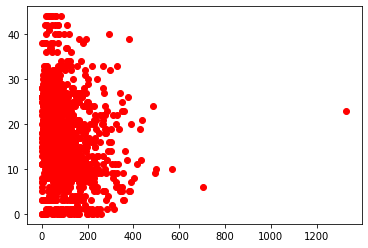

In [9]:
for result in results:
  if result[0] > 500 or math.isnan(result[0]) or math.isnan(result[1]):
    results.remove(result)
plt.plot([result[0] for result in results], [result[1] for result in results], 'ro')
print(results)

In [10]:
from numpy import cov
print(cov([result[0] for result in results], [result[1] for result in results]))


[[        nan         nan]
 [        nan 77.36284214]]


In [11]:
def histogram_intersection(a, b):
  v = np.minimum(a, b).sum().round(decimals=1)
  return v

In [12]:
s1 = pd.Series([result[0] for result in results])
s2 = pd.Series([result[1] for result in results])
s1.corr(s2, method=histogram_intersection)

21553.0

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(results)

In [14]:
scaled

array([[0.03160271, 0.        ],
       [0.14823175, 0.02272727],
       [0.0496614 , 0.02272727],
       ...,
       [0.00451467, 0.        ],
       [0.06094808, 0.        ],
       [0.00075245, 0.        ]])

In [15]:
s1 = pd.Series([scaled[0] for scaled in scaled])
s2 = pd.Series([scaled[1] for scaled in scaled])

In [16]:
s1.corr(s2, method=histogram_intersection)

91.6

In [17]:
print(cov([scaled[0] for scaled in scaled], [scaled[1] for scaled in scaled]))

[[       nan        nan]
 [       nan 0.03996015]]
